In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, iris.target,
test_size=0.3)

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
base = DecisionTreeClassifier(criterion='gini', max_depth=1)
model_ada = AdaBoostClassifier(base_estimator=base, n_estimators=10)
model_ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=10)

In [4]:
model_ada.estimators_

[DecisionTreeClassifier(max_depth=1, random_state=173380828),
 DecisionTreeClassifier(max_depth=1, random_state=1334310817),
 DecisionTreeClassifier(max_depth=1, random_state=2098493327),
 DecisionTreeClassifier(max_depth=1, random_state=211058598),
 DecisionTreeClassifier(max_depth=1, random_state=1198379017),
 DecisionTreeClassifier(max_depth=1, random_state=1044442797),
 DecisionTreeClassifier(max_depth=1, random_state=866779292),
 DecisionTreeClassifier(max_depth=1, random_state=715670262),
 DecisionTreeClassifier(max_depth=1, random_state=1544615119),
 DecisionTreeClassifier(max_depth=1, random_state=154542679)]

In [5]:
model_ada.feature_importances_

array([0. , 0. , 0.4, 0.6])

In [6]:
## Visualizing the impact of base_model on the overall accuracy

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

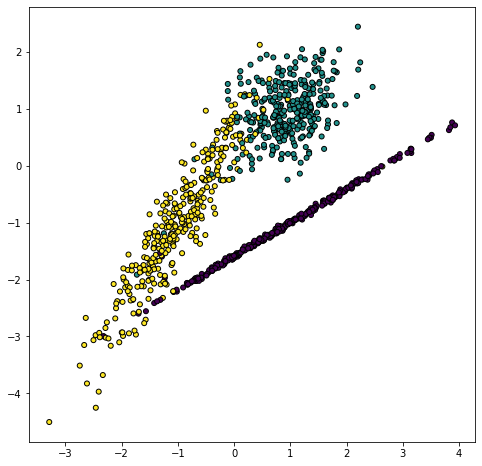

In [8]:
plt.figure(figsize=(8,8))
X, y = make_classification(n_samples = 1000, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

In [9]:
X

array([[-1.38388732, -1.67419493],
       [ 1.63491244,  1.06283268],
       [-1.01752806, -2.2118423 ],
       ...,
       [-0.7365789 , -0.56925721],
       [ 0.10251647, -0.09337895],
       [ 1.34266194,  1.25216039]])

In [10]:
y

array([2, 1, 0, 2, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 2, 2,
       2, 2, 1, 2, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 2, 0, 0, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0, 1, 2, 1, 2, 1,
       1, 1, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 1, 2, 0, 0, 1, 0, 1, 0, 2, 1,
       1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 2, 1, 2, 1, 0, 1, 0, 1, 0, 2, 2, 1,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 0, 2, 2, 0, 1, 2, 0, 0,
       2, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 2, 0, 1, 0, 0,
       1, 0, 0, 2, 1, 2, 2, 0, 2, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 0,
       0, 1, 1, 1, 1, 1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0,
       1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0,
       2, 1, 1, 0, 1, 0, 2, 0, 2, 2, 0, 2, 1, 0, 2,

In [11]:
### Training a model with adaboost using make_classification method for data

In [12]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples = 3000, n_features=10, n_redundant=0, n_informative=10, n_clusters_per_class=1, n_classes=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_history = []

In [15]:
for i in range(1, 20):
    tree1 = DecisionTreeClassifier(max_depth = i)
    model_ada1 = AdaBoostClassifier(base_estimator=tree1, n_estimators=50)
    model_ada1.fit(X_train, y_train)
    y_pred = model_ada1.predict(X_test)
    accuracy_history.append(accuracy_score(y_test, y_pred))

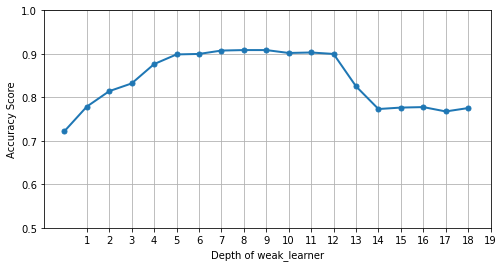

In [18]:
plt.figure(figsize=(8, 4))
plt.plot(accuracy_history, marker='o', linestyle='solid', linewidth=2, markersize=5)
plt.grid(True)
plt.xticks(range(1,20))
plt.ylim((0.5,1))
plt.xlabel("Depth of weak_learner")
plt.ylabel("Accuracy Score")
plt.show()

In [19]:
# From the above figure, there’s an increase in accuracy in the beginning as we
# make the constituent trees more complex – however, beyond a certain depth, there is no
# improvement in accuracy. In some practical scenarios, stumps or very simple decision
# trees can provide good enough accuracy for relatively low computation requirements